In [224]:
import pandas as pd
from scipy.stats import norm
import numpy as np


In [225]:
data = pd.read_csv('2weeks.csv', sep=';')

In [226]:
data.drop(['Position', 'Open time', 'Open price', 'Close time', 'Close price', 'Rollover', 'Commission', 'T/P', 'S/L'], axis='columns', inplace=True)

In [227]:
net_profit = pd.DataFrame(data)
net_profit

,Symbol,Type,Lots,Profit,Net profit,Swap,Margin
0,GBPUSD,Buy,0.01,1.45,1.21,-0.24,6.17
1,US30,Buy,0.01,1.15,0.73,-0.42,8.30
2,USDJPY,Buy,0.02,2.38,2.38,0.00,10.00
3,GBPUSD,Buy,0.01,1.88,1.70,-0.18,6.17
4,OIL.WTI,Buy,0.01,3.80,3.80,0.00,10.87
5,US30,Buy,0.01,1.65,1.65,0.00,8.30
6,USDJPY,Buy Stop,0.02,-2.00,-2.00,0.00,10.00
7,US30,Sell,0.01,0.30,0.30,0.00,8.28
8,USDJPY,Buy,0.01,6.71,6.82,0.11,5.00
9,OIL.WTI,Sell Stop,0.01,-2.40,-2.40,0.00,10.87


Net profit    14.75
Net profit     8.65
Net profit    15.47
Net profit    24.77
Net profit     9.73
              ...  
Net profit    17.80
Net profit    17.19
Net profit    -1.55
Net profit    27.78
Net profit     9.35
Length: 1000, dtype: float64

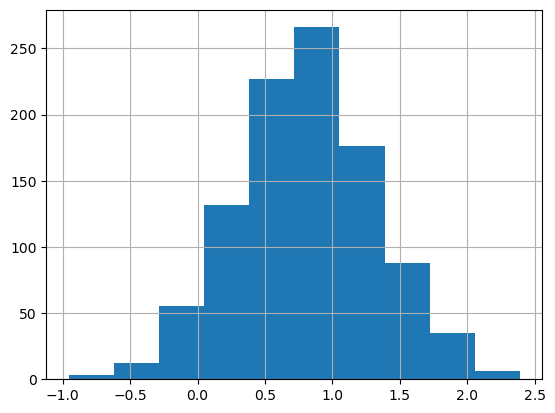

In [228]:
amostra = [net_profit['Net profit'].sample(n=len(net_profit), replace=True, ignore_index=True) for i in range(0, 1000)]
amostra = pd.DataFrame(amostra).T
amostra.mean().hist()
amostra.sum()

In [229]:
ganho_maximo = amostra.sum().max()
perda_maxima = amostra.sum().min()
ganho_medio = amostra.sum().mean()
print(f'Ganho Amostral Máximo: R${ganho_maximo:.2f}\nPerda Amostral Máxima: R${perda_maxima:.2f}\nGanho Amostral Médio: R${ganho_medio:.2f}')

Ganho Amostral Máximo: R$64.54
Perda Amostral Máxima: R$-25.76
Ganho Amostral Médio: R$21.80


In [230]:
media = amostra['Net profit'].sum().mean()
desvio_padrao = amostra['Net profit'].sum().std()
z = norm.ppf(0.975)
e = z * desvio_padrao
n = (z * (desvio_padrao / e)) ** 2
n = int(n.round())
intervalo = norm.interval(alpha = 0.95, loc = media, scale = desvio_padrao / np.sqrt(n))

C:\Users\dduca\AppData\Local\Temp\ipykernel_16192\2624847431.py:7: DeprecationWarning: Use of keyword argument 'alpha' for method 'interval' is deprecated and wil be removed in SciPy 1.11.0. Use first positional argument or keyword argument 'confidence' instead.
  intervalo = norm.interval(alpha = 0.95, loc = media, scale = desvio_padrao / np.sqrt(n))


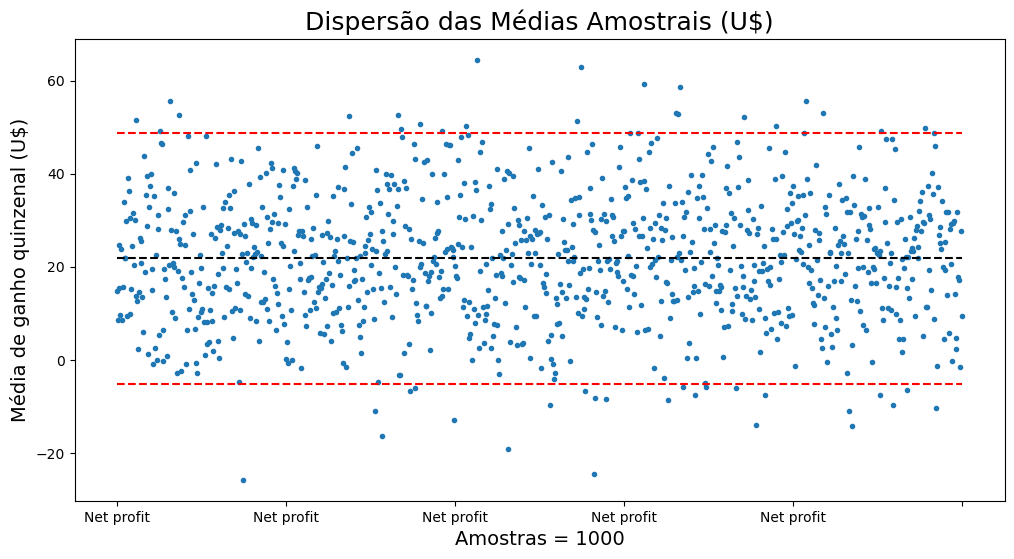

In [231]:
ax = amostra.sum().plot(style = '.')
ax.figure.set_size_inches(12, 6)
ax.set_title('Dispersão das Médias Amostrais (U$)', fontsize=18)
ax.set_ylabel('Média de ganho quinzenal (U$)', fontsize=14)
ax.set_xlabel('Amostras = 1000', fontsize=14)
ax.hlines(y = media, xmin = 0, xmax = 1000, colors='black', linestyles='dashed')
ax.hlines(y = intervalo[0], xmin = 0, xmax = 1000, colors='red', linestyles='dashed')
ax.hlines(y = intervalo[1], xmin = 0, xmax = 1000, colors='red', linestyles='dashed')
ax=ax